In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = [20,30,25,17,36,40,46,55,52,27,50,33,42,21,48,37,23,33,14,19,52]
y = [41,63,51,39,78,75,87,98,102,60,101,70,86,47,90,69,58,64,41,47,98]

In [3]:
print(len(x))
print(len(y))

21
21


###  Problem Statement - Bassed on the values of x, predict the values of y using the Linear Regression

In [4]:
df = pd.DataFrame({'x': x, 'y':y })

In [5]:
df.head()

,x,y
0,20,41
1,30,63
2,25,51
3,17,39
4,36,78


In [6]:
df.shape

(21, 2)

In [7]:
df.isnull().sum()

x    0
y    0
dtype: int64

In [8]:
df.dtypes

x    int64
y    int64
dtype: object

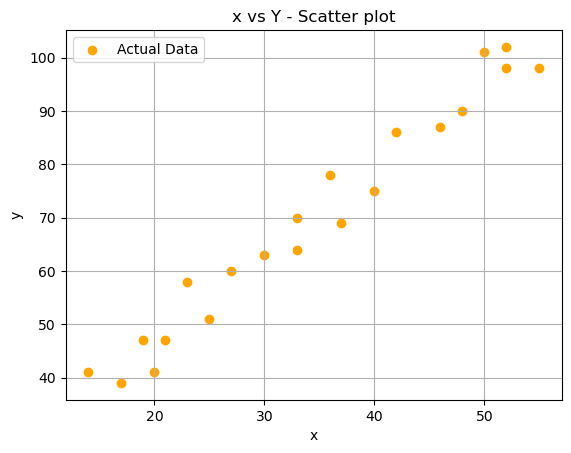

In [9]:
plt.scatter(df['x'], df['y'], color = 'orange', label = 'Actual Data')
plt.title('x vs Y - Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [10]:
x = (df[['x']])
y = (df['y'])

print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [11]:
print(x.shape)
print

(21, 1)


<function print>

### Build Model:


#### Import library for model


In [17]:
from sklearn .linear_model import LinearRegression

In [19]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [20]:
print(type(x))

<class 'pandas.core.frame.DataFrame'>


### 2) Generate the predictions

In [22]:
ypred = model.predict(x)
print(ypred)

[ 46.76135555  62.86174     54.81154777  41.93124021  72.52197067
  78.96212445  88.62235512 103.11270112  98.28258579  58.03162466
  95.0625089   67.69185533  82.18220134  48.37139399  91.84243201
  74.13200911  51.59147088  67.69185533  37.10112488  45.1513171
  98.28258579]


In [24]:
df['y_pred'] = ypred
df.head()

,x,y,y_pred
0,20,41,46.761356
1,30,63,62.861740
2,25,51,54.811548
3,17,39,41.931240
4,36,78,72.521971


In [25]:
# For regression model, model.score() = R_score

print('Model_Scor e: ',model.score(x,y) )

Model_Score:  0.9656182816033277


###  Compute M (coeffcient or slope) and C (intercept) value

In [28]:
## y_pred = mx +c
m = model.coef_
c = model.intercept_

print('Coefficient or Slope', m)
print('Intercept or Constant', c)

Coefficient or Slope [1.61003845]
Intercept or Constant 14.56058664388435


###  Equation for Linear Regression : ypred = mx + c

In [29]:
# Y_pred = mx + c
df['y_pred_eqn'] = m*df['x'] + c
df.head()

,x,y,y_pred,y_pred_eqn
0,20,41,46.761356,46.761356
1,30,63,62.861740,62.861740
2,25,51,54.811548,54.811548
3,17,39,41.931240,41.931240
4,36,78,72.521971,72.521971


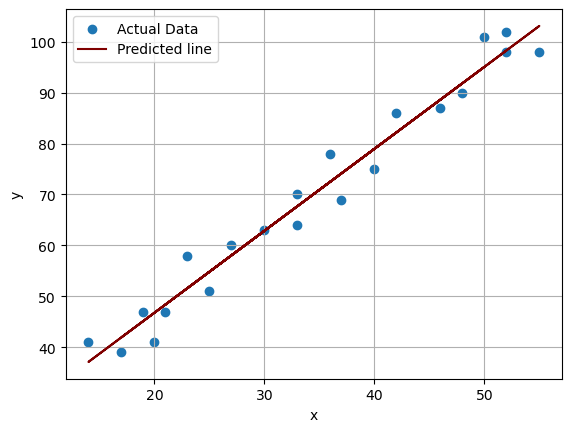

In [31]:
plt.scatter (df['x'], df['y'], label  = 'Actual Data')
plt.plot(df['x'], df['y_pred'], color ='maroon' ,label = 'Predicted line')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

In [32]:
df.head()

,x,y,y_pred,y_pred_eqn
0,20,41,46.761356,46.761356
1,30,63,62.861740,62.861740
2,25,51,54.811548,54.811548
3,17,39,41.931240,41.931240
4,36,78,72.521971,72.521971


###  Compute Evaluation metrics  for Regression 


SSE = sum((yi-ypredi)^2)<br>
SSR = sum((ypredi - y_avg)^2)
SST = SSR +SSE


In [44]:
df['y_avge'] = df['y'].mean()
df['SSE'] = (df['y'] - df['y_pred']) **2 # SSE = Sum of Squared Error 
df['SSR'] = (df['y_pred'] - df['y_avge']) **2 # SSE = Regrerssion Sum Of Square 
df.head()
 

,x,y,y_pred,y_pred_eqn,y_avge,SSE,SSR
0,20,41,46.761356,46.761356,69.761905,33.193218,529.025264
1,30,63,62.861740,62.861740,69.761905,0.019116,47.612274
2,25,51,54.811548,54.811548,69.761905,14.527896,223.513174
3,17,39,41.931240,41.931240,69.761905,8.592169,774.545889
4,36,78,72.521971,72.521971,69.761905,30.008805,7.617964


In [46]:
sst = df['SSE'].sum() + df['SSR'].sum()
print('SST : ',sst )

SST :  8977.809523809532


###  Regression Metrics

MSE = mean(SSE)<br>
MAE = mean(|yi - ypred|)<br>
RMSE = sqrt(MAE)

R2_Score = 1- (SSE / SST)

In [52]:
mse = df['SSE'].mean()
mae = abs(df['y'] - df['y_pred']).mean()
r2_score = 1 - df['SSE'].sum()/sst
print('MAE: ', mae)
print('MSE', mse)
print('R2_score: ', r2_score)
print('Model_Scor e: ',model.score(x,y) )

MAE:  3.3830095672043567
MSE 14.698691374599107
R2_score:  0.9656182816033277
Model_Scor e:  0.9656182816033277


In [53]:
 from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [61]:
ypred = model.predict(x)
print(ypred)

[ 46.76135555  62.86174     54.81154777  41.93124021  72.52197067
  78.96212445  88.62235512 103.11270112  98.28258579  58.03162466
  95.0625089   67.69185533  82.18220134  48.37139399  91.84243201
  74.13200911  51.59147088  67.69185533  37.10112488  45.1513171
  98.28258579]


In [64]:
mae = mean_absolute_error(y,ypred)
mse = mean_squared_error(y,ypred)
rmse = np.sqrt(mean_squared_error(y,ypred))
r2s  = r2_score(y,ypred)
print('MAE : ',mae)
print('MSE : ',mse)
print('RMSE : ',rmse)
print('r2s : ' , r2s)

MAE :  3.3830095672043567
MSE :  14.698691374599107
RMSE :  3.833887240725672
r2s :  0.9656182816033277


### Predictions For a specific value using LinReg  Model 

In [65]:
print(m,c)

[1.61003845] 14.56058664388435


### Predictions for single value
Predict y when x = 57

In [68]:
ypred57_m1 = model.predict([[57]])
print(ypred57_m1)
ypred57_m2 = m*57 + c
print(ypred57_m2)

[106.33277802]
[106.33277802]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
